<div style="border-radius:10px;
            border:#1a156f solid;
           background-color:#7db0df;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#03011a; font-weight: bold; font-family: Cursive">
Market Segmentation Analysis for a Fast Food Company</h1></center>    

</div>

<p align="center">
  <img width="1000" height="300" src="https://vietnamcredit.com.vn/Media/Vietnam-fast-food-market-not-an-opportunity-for-foreign-investors-01.jpg">
</p>

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Project Objective</h3></center>
</div>

* **Our aim is to figure out if there are different groups of customers who see our brand in different ways.**  
* **By identifying these groups and understanding their perspectives, we can tailor our messages to connect with them better, enhancing their relationship with the brand.**

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
About the company</h3></center>
</div>

**We are working for a fast food company here that recently comducted a survey among its customers.**  
  
**The survey includes questions like**
* **1.  Age**
* **2.  Gender**
* **3. Visiting Frequency**
* **4. Rating on a scale of -5 to +5**
* **5. 11 Yes/No questions about how if they find our food tasty, cheap , healthy , etc**

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Table of Contents</h3></center>
</div>

- [1. Import Libraries and Data](#Import_Libraries_and_Data)
- [2. Handling Missing Values](#Handling_Missing_Values)
- [3. Data Cleaning and preprocessing](#Data_Cleaning_and_preprocessing)
- [5. Data Analysis and Visualization](#Data_Analysis_and_Visualization)
- [6. Outlier Detection](#Outlier_Detection)
- [7. Check for Rare Categories](#Check_for_Rare_Categories)
- [8. Feature Scaling](#Feature_Scaling)
- [9. Dimensionality Reduction](#Dimensionality_Reduction)
- [10. Clustering](#Clustering)
- [11. Clusters Analysis and Customers Profiling](#Clusters_Analysis_and_Customers_Profiling)

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Import Libraries and Data</h3></center>
</div>

In [1]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Lets import the dataset

In [2]:
df = pd.read_excel('dataset .xls')

# <a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Handling Missing Values</h3></center>
</div>

let's find if we have missing values in the dataset. 

In [3]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

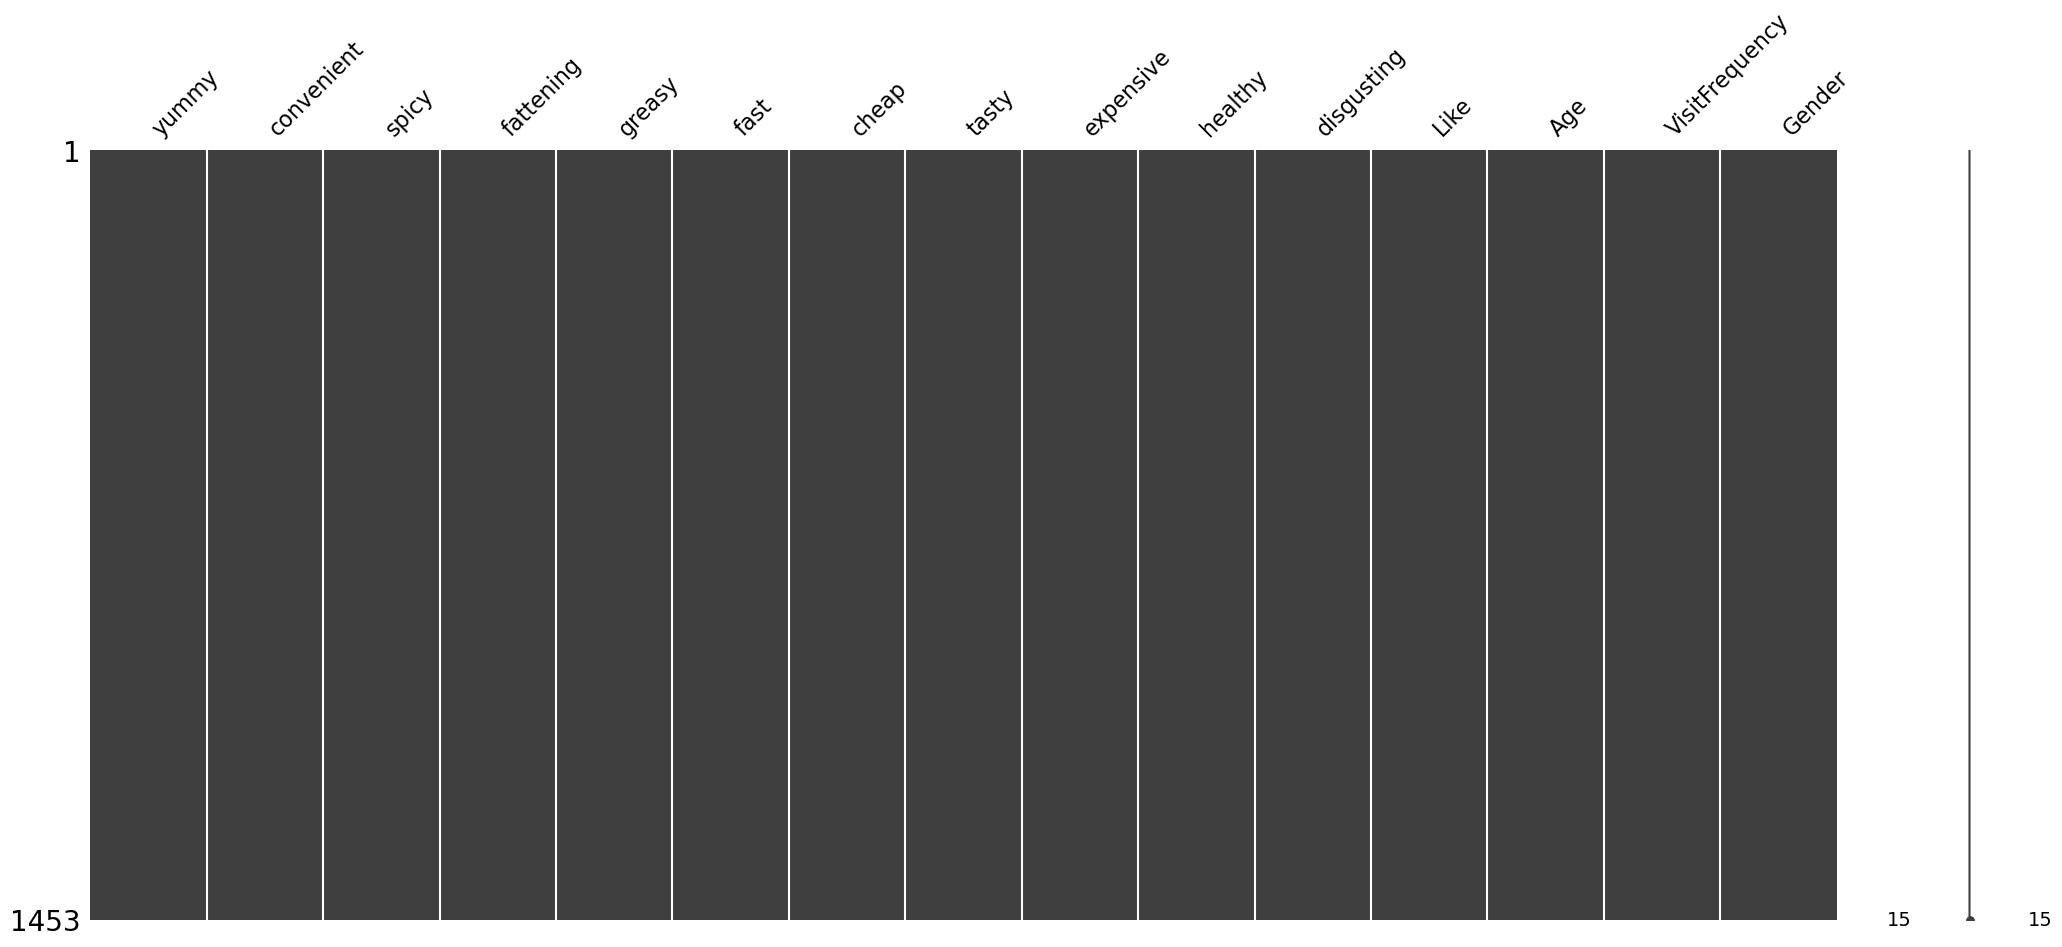

In [4]:
msno.matrix(df);

let's find if we have duplicate rows.

In [5]:
df.duplicated().sum()

22

In [6]:
#Dupilcate data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

In [7]:
#Duplicate data according all colum
df[df.duplicated()]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,I love it!+5,50,Once a week,Female
421,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,3,25,Once a month,Male
441,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,2,62,Every three months,Female
453,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,2,43,Every three months,Female
598,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,59,Never,Female
674,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,26,More than once a week,Female
710,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,4,49,Once a week,Female
725,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,0,42,Once a month,Female
741,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,2,21,Every three months,Female
744,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,18,Once a week,Female


# <a name='Data_cleaning_and_preprocessing'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Data cleaning and preprocessing</h3></center>
</div>

In [8]:
df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female


In [9]:
df.shape

(1453, 15)

There are 1453 cutomers and 15 features in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [11]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [12]:
df.describe(include=object).T

,count,unique,top,freq
yummy,1453,2,Yes,803
convenient,1453,2,Yes,1319
spicy,1453,2,No,1317
fattening,1453,2,Yes,1260
greasy,1453,2,Yes,765
fast,1453,2,Yes,1308
cheap,1453,2,Yes,870
tasty,1453,2,Yes,936
expensive,1453,2,No,933
healthy,1453,2,No,1164


* As discussed above, we have survey data of 1453 customers , about how they feel about the brand along with their respective gender,age , rating and frequency of visit.
* Like the first respondent is a 61 year old female who visits every three months for the convenience but does not find our products to be tasty.

### Lets see all the unique values in each column

In [13]:
values_table = pd.DataFrame(columns=['Column Name', 'Unique Values'])

In [14]:
import pandas as pd

# Assuming df is your DataFrame containing your dataset
values_table_rows = []

for column in df.columns:
    unique_values = df[column].unique()
    for value in unique_values:
        values_table_rows.append({'Column Name': column, 'Unique Values': value})

values_table = pd.DataFrame(values_table_rows)
print(values_table)

       Column Name          Unique Values
0            yummy                     No
1            yummy                    Yes
2       convenient                    Yes
3       convenient                     No
4            spicy                     No
..             ...                    ...
90  VisitFrequency            Once a year
91  VisitFrequency  More than once a week
92  VisitFrequency                  Never
93          Gender                 Female
94          Gender                   Male

[95 rows x 2 columns]


In [15]:
pd.set_option('display.max_colwidth', None)
values_table

,Column Name,Unique Values
0,yummy,No
1,yummy,Yes
2,convenient,Yes
3,convenient,No
4,spicy,No
...,...,...
90,VisitFrequency,Once a year
91,VisitFrequency,More than once a week
92,VisitFrequency,Never
93,Gender,Female


### Lets get dummy variables for the first eleven columns

The first 11 columns just has "Yes" and "No" values lets replace them with 1 and 0 respectively

In [16]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [17]:
df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female


### Now, Lets remove the 'i love it' and 'i hate it' part from the "Like" Column

In [18]:
def slicer(x):
    if(len(x)>2):
        return x.split('!')[1]
    else:
        return x

In [19]:
df['Like']=df['Like'].apply(lambda x:str(x))     #Converting values to string so we can check their length
df['Like']=df['Like'].apply(lambda x:slicer(x))  #Slicing the values to return only the numeric rating part
df['Like']=df['Like'].apply(lambda x:int(x))     # Converting values into int type again

In [20]:
df['Like'].unique()

array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1], dtype=int64)

In [21]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


The data looks good now , lets move to EDA

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">
    <center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    4: Exploratory data analysis (EDA)</h3></center>
</div>


In [22]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000


### Lets plot the mean of the 11 features , to get an idea of the general perception people have.

In [23]:
df_temp=pd.DataFrame(df.describe().loc['mean'].round(2)[2:13])
df_temp

,mean
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20
disgusting,0.24
Like,0.78


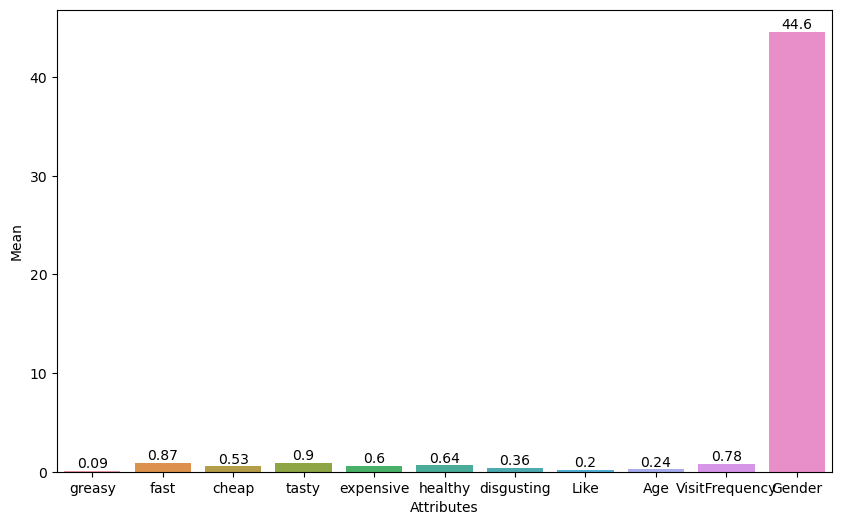

In [24]:
plt.figure(figsize=(10,6))

ax=sns.barplot(x=df.columns[4:],y=df_temp['mean'])
ax.set_xlabel("Attributes")
ax.set_ylabel("Mean")
for i in ax.containers:
    ax.bar_label(i,)

* **The data indicates that about half of the respondents (55%) perceive our food as YUMMY**
* **91% believe it is CONVENIENT**
* **Only 9% think food is SPICY**
* **24 % find it disgusting**

### Gender distribution of the customers

In [25]:
gender_distribution = df.groupby('Gender')['Like'].count()
gender_distribution

Gender
Female    788
Male      665
Name: Like, dtype: int64

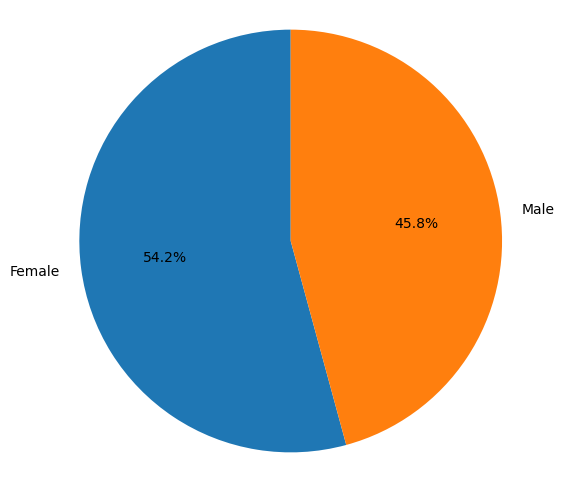

In [26]:
labels = gender_distribution.index
sizes = gender_distribution.values

plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 

plt.show()


* **Around 54.2% of our customers are female**

### Age Distribution of customers

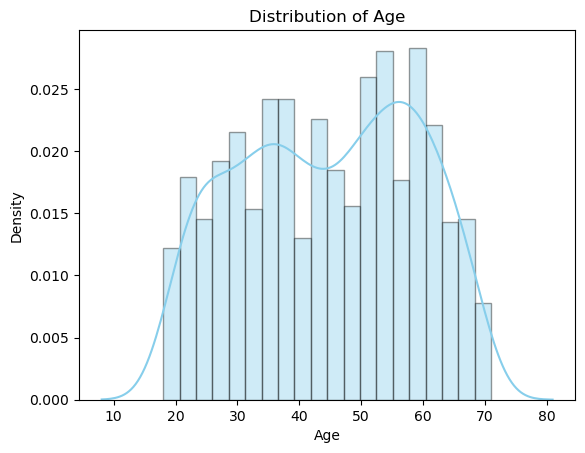

In [27]:
sns.distplot(df['Age'], bins=20, color='skyblue', hist_kws={"edgecolor": "black"})
plt.title("Distribution of Age")
plt.show()


* **The age distribution is alomost uniform but we have more people in the 50-60 age group**

### Distribution of ratings 

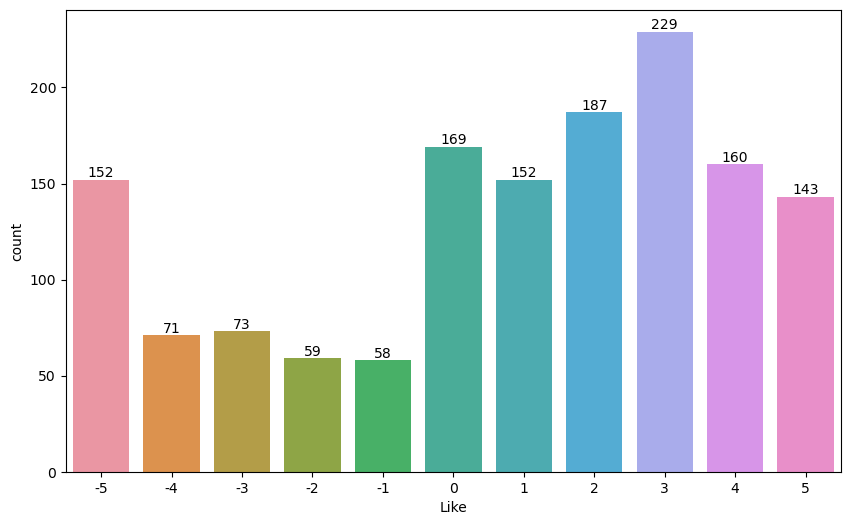

In [28]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Like',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

* **More People have a positive perception of our brand, evident from the fact that more people have given us in the higher ratings than a lower rating**

### Rating distribution amoung different age groups and gender.

<Axes: xlabel='Like', ylabel='Age'>

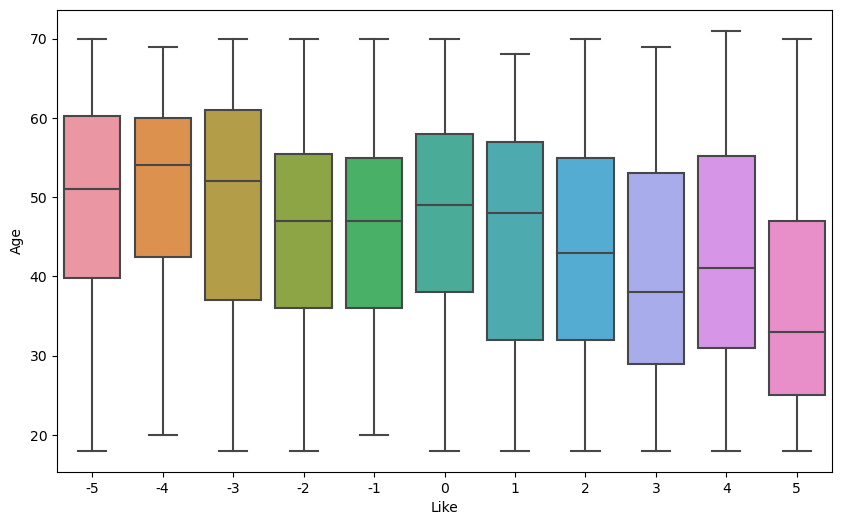

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Like", y="Age",data=df,)

* **Young people tend to like our brand more,the company can focus on young population. Also, we need to add more options to win old people.**

<Axes: xlabel='Like', ylabel='Gender'>

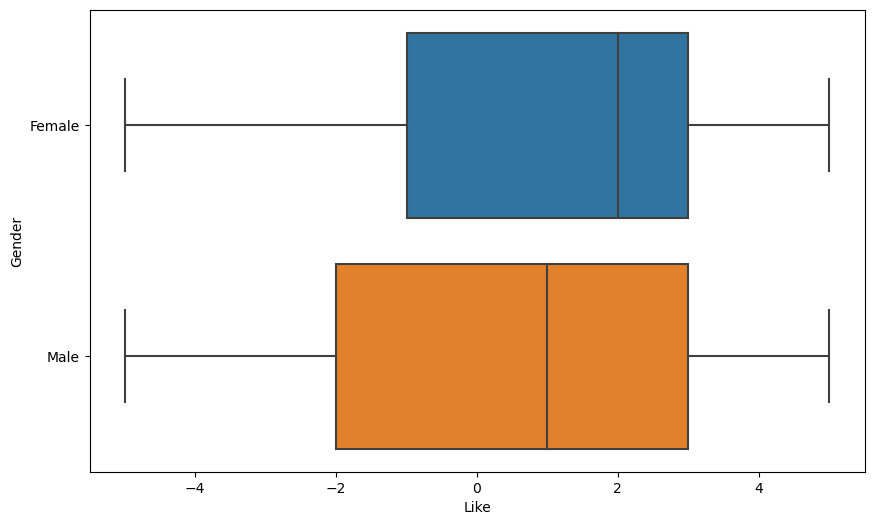

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Like", y="Gender",data=df)

* **It looks like females have a more positive perception about us. This also explains why the survey respondents who were essentially our customers were more women.**

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">
    <center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    5.PCA</h3></center>
</div>


### Lets store the 11 features in a separate dataframe

In [31]:
df_criteria=df[['yummy', 'convenient',
       'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive',
       'healthy', 'disgusting']]

In [32]:
df_criteria.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0


In [33]:
from sklearn.decomposition import PCA
pca = PCA()

In [34]:
x_pca=pca.fit_transform(df_criteria)

In [35]:
pca.explained_variance_ratio_*100

array([29.94472319, 19.27972137, 13.30453519,  8.30957781,  5.94805227,
        5.02995614,  4.38490997,  3.95477912,  3.67608973,  3.23532907,
        2.93232614])

#### The first and second principle components captures around 50% information.

### Lets get our 1452 data points in terms of these 11 principle components into a dataframe

In [36]:
x_pca.shape   #Just a Check

(1453, 11)

In [37]:
Data_with_PCs=pd.DataFrame(x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
Data_with_PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


### Now Lets see how the 11 attributes relates to these 11 principle components

In [38]:
pca.components_.shape

(11, 11)

In [39]:
PC_composition=pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],columns=df_criteria.columns)

In [40]:
PC_composition

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
PC2,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
PC3,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
PC4,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
PC5,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
PC6,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
PC7,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
PC8,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
PC9,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
PC10,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


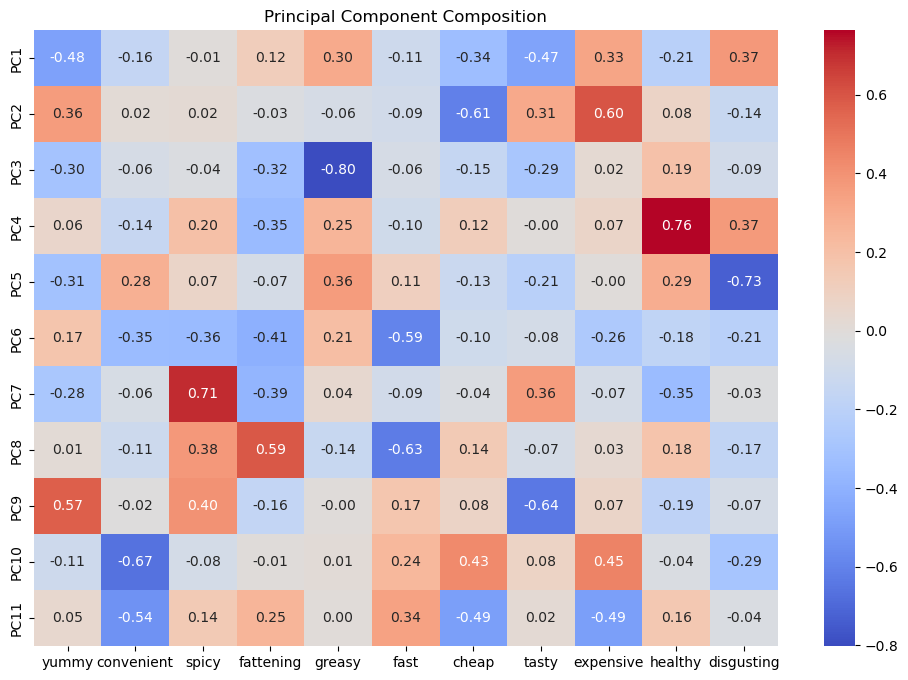

In [41]:
sns.set_palette("coolwarm")
plt.figure(figsize=(12, 8))
plt.title("Principal Component Composition")
sns.heatmap(PC_composition, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


* **In relation to Principal Component 1, the variables 'Yummy' and 'Disgusting' exhibit the highest loadings. Notably, 'Yummy' has the highest positive loading, while 'Disgusting' displays the most negative loading. This pattern of loadings suggests that Principal Component 1 primarily captures the 'taste' dimension.**

* **For Principal Component 2, the variable'Cheap' displays the most negative loading, while 'Expensive' exhibits the highest positive loading. This prominent pattern of loadings strongly suggests that Principal Component 2 effectively captures the 'price' dimension.**

### Now lets use the 2 principle components to map different customers and 11 features in 2-D space

In [42]:
def biplot(score,coeff,labels):
    xs = score[:,0]         # Extract the PCA1 scores for all rows(1453 here)
    ys = score[:,1]         # Extract the PCA1 scores for all rows(1453 here) 
    n= coeff.shape[0]       # Gives info about how many original varibales there were (11 here)
    scalex = 1.5/(xs.max()-xs.min())
    scaley = 1.5/(ys.max()-ys.min())
    fig,ax = plt.subplots(figsize=(12,10))
    
    sns.scatterplot(xs*scalex,ys*scaley)
    
    #for i ,txt in enumerate(names):
        #ax.annotate(txt,(xs[i]*scalex,ys[i]*scaley))
        
    for i in range(n):
        ax.arrow(0,0,coeff[i,0],coeff[i,1],color='r',alpha=0.5)
        ax.text(coeff[i,0]*1.15,coeff[i,1]*1.15,labels[i],color='g',ha='center',va='center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC1 : Taste Dimension")
    ax.set_ylabel("PC2 : Price DImension")
    

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def biplot(score, coeff, labels):
    xs = score[:, 0]         # Extract the PCA1 scores for all rows (1453 here)
    ys = score[:, 1]         # Extract the PCA1 scores for all rows (1453 here)
    n = coeff.shape[0]       # Gives info about how many original variables there were (11 here)
    scalex = 1.5 / (xs.max() - xs.min())
    scaley = 1.5 / (ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.scatterplot(x=xs * scalex, y=ys * scaley, ax=ax)

    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("PC1: Taste Dimension")
    ax.set_ylabel("PC2: Price Dimension")


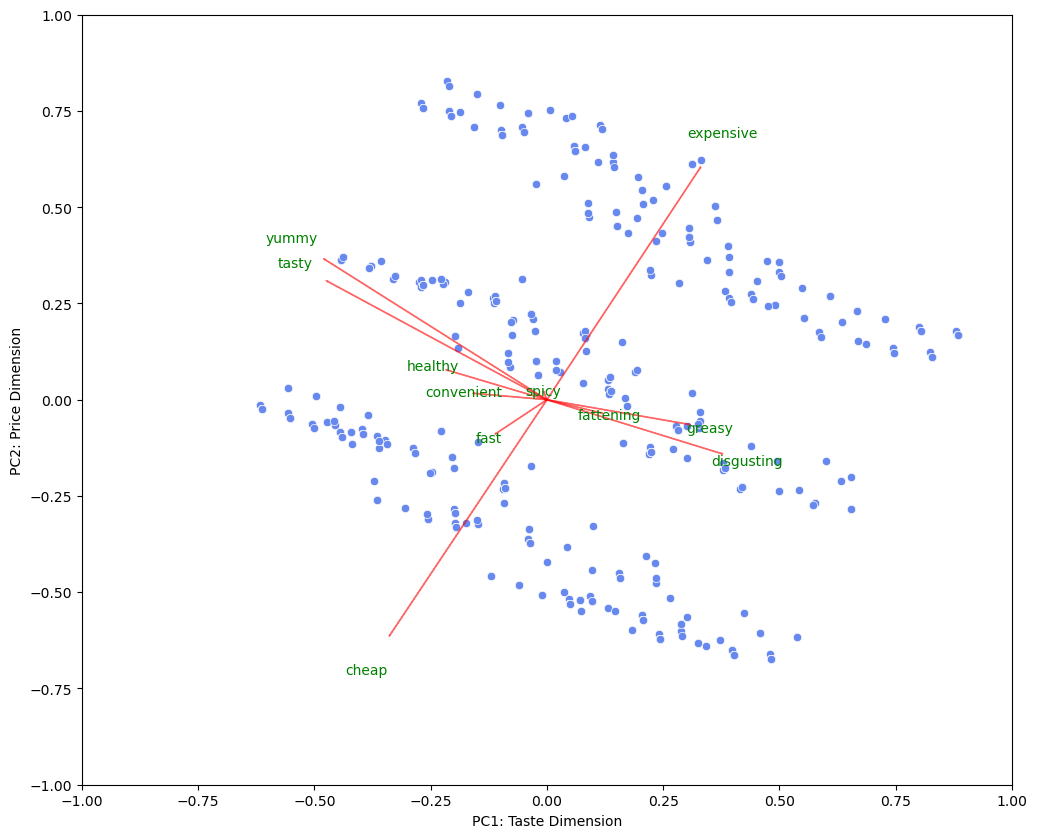

In [44]:
biplot(Data_with_PCs.values[:,0:2],np.transpose(PC_composition.values[0:2,:]),labels=df_criteria.columns)

* **Two attributes, 'CHEAP' and 'EXPENSIVE,' stand out as significant. These two attributes have a major influence on how products are evaluated, and they seem to be assessed independently of the other attributes.**
* **The remaining attributes can be grouped into positive and negative perceptions. Attributes like 'FATTENING,' 'DISGUSTING,' and 'GREASY' point in the same direction on the plot. This suggests that people who perceive a product as 'FATTENING' are also likely to perceive it as 'DISGUSTING' and 'GREASY.' On the other hand, positive attributes like 'FAST,' 'CONVENIENT,' 'HEALTHY,' 'TASTY,' and 'YUMMY' are aligned in the opposite direction.**
* **In terms of the 'EXPENSIVE' versus 'CHEAP' axis, we can see distinct groups of observations. There's a cluster of consumers at the bottom around the 'CHEAP' arrow, indicating they associate the product with being affordable. At the top, there's another cluster of respondents around the 'EXPENSIVE' arrow, suggesting they perceive the product as costly. Additionally, there's a middle group of respondents between these two clusters.**

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">
    <center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    6. Extracting Segments using K-Means Clusturing</h3></center>
</div>

### First let us find the number of k(segments) we should form

In [45]:
from yellowbrick.cluster import KElbowVisualizer

In [46]:
from sklearn.cluster import KMeans

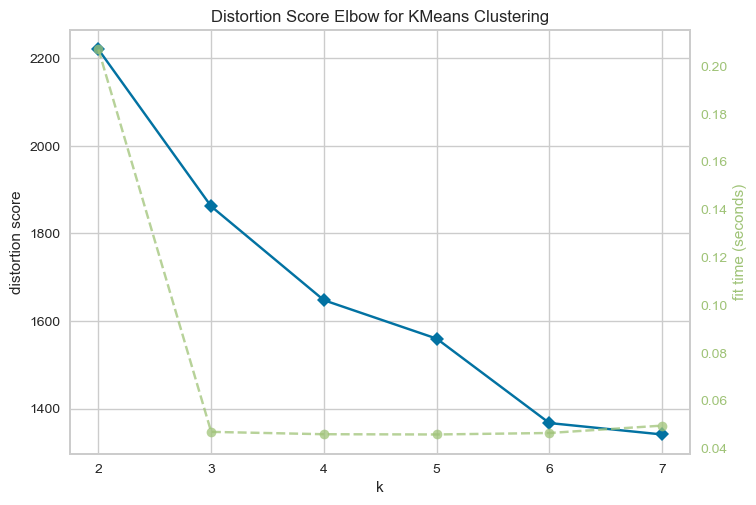

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8)).fit(df_criteria)
visualizer.show()

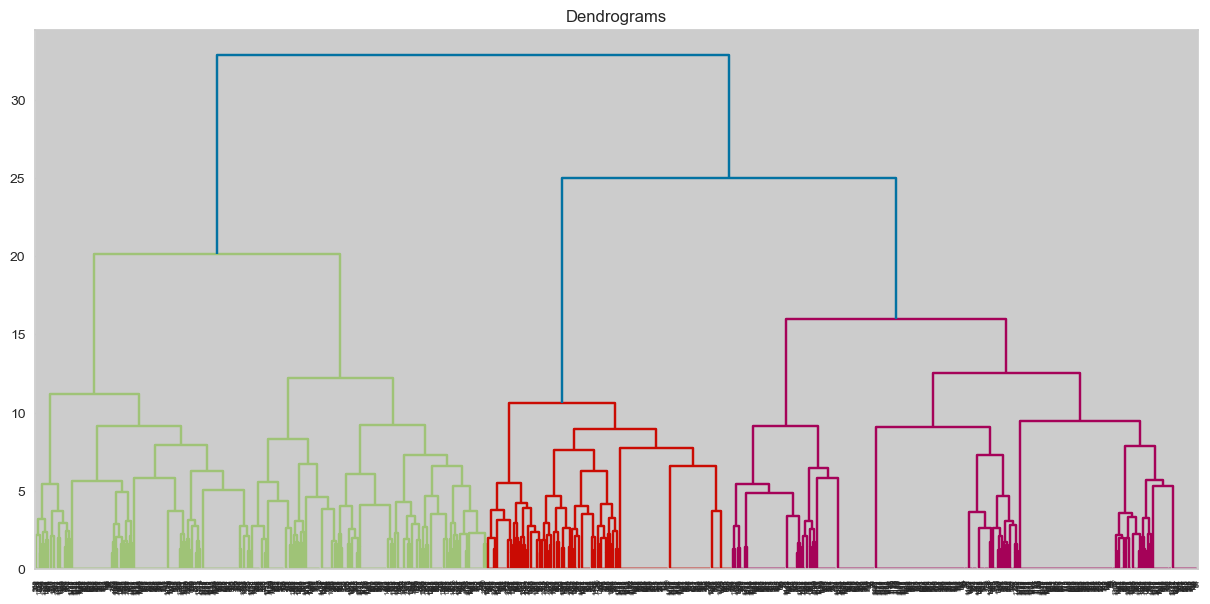

In [48]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_criteria, method='ward'))

### From all the above analysis, we can conclude that 4 clusters seems like a good fit for the data.

### Applying k means to get 4 customer segments

In [49]:
kmeans = KMeans(n_clusters=4).fit(df_criteria)

In [50]:
segments=kmeans.labels_
segments.shape

(1453,)

In [51]:
df_criteria['Cluster']=segments
df_criteria.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,0


### Lets rename the clusters a little better.

In [52]:
def Cluster_namer(num):
    if(num==0):
        return 'A'
    elif(num==1):
        return 'B'
    elif(num==2):
        return 'C'
    else:
        return 'D'

In [53]:
df_criteria['Cluster']=df_criteria['Cluster'].apply(lambda x:Cluster_namer(x))

In [54]:
df_criteria.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,B
1,1,1,0,1,1,1,1,1,1,0,0,A
2,0,1,1,1,1,1,0,1,1,1,0,A
3,1,1,0,1,1,1,1,1,0,0,1,C
4,0,1,0,1,1,1,1,0,0,1,0,B


<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">
    <center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    7. Analyzing the segments</h3></center>
</div>

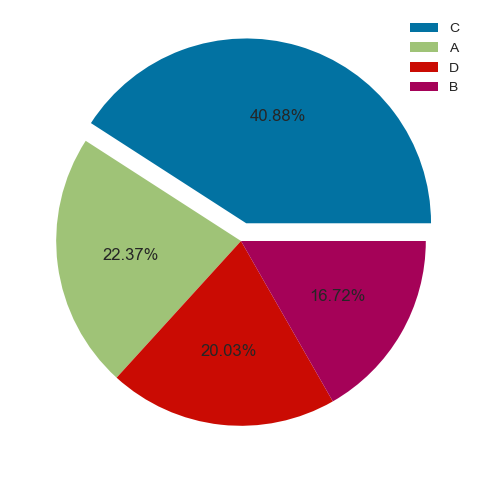

In [55]:
plt.figure(figsize=(6,6))
plt.pie(df_criteria['Cluster'].value_counts(),autopct='%1.2f%%',explode=[.1,0,0,0])
plt.legend(df_criteria['Cluster'].value_counts().index)
plt.show()

* **The majority of people are in segment B around 40% followed by segment D**

Text(0.5, 1.0, 'Cluster D')

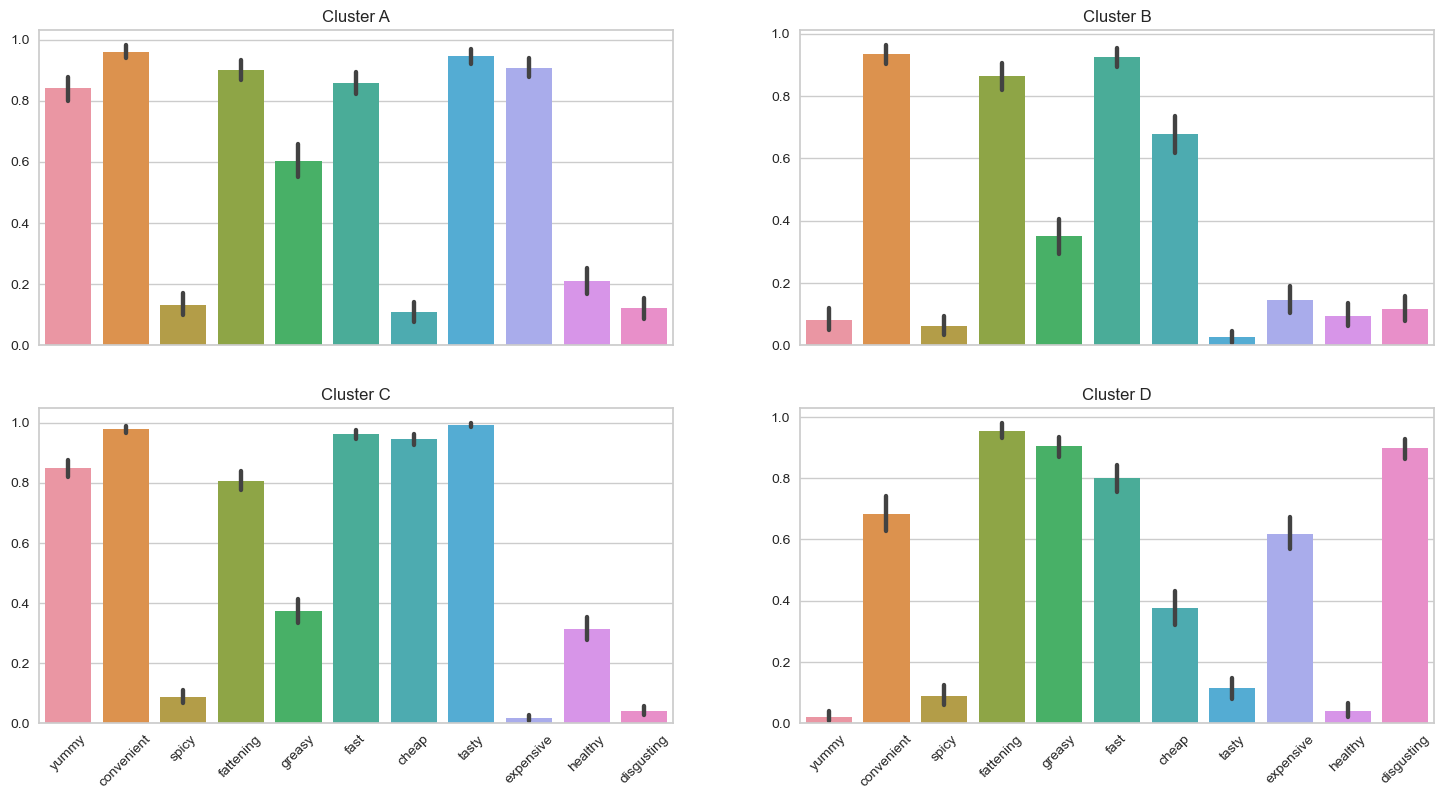

In [56]:
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
#plt.figure(figsize=(5,4))


sns.barplot(data=df_criteria[df_criteria['Cluster']=='A'].drop(['Cluster'],axis=1))
plt.tick_params(axis='x',label1On=False)
plt.title('Cluster A')

plt.subplot(2,2,2)
#plt.figure(figsize=(5,4))

sns.barplot(data=df_criteria[df_criteria['Cluster']=='B'].drop(['Cluster'],axis=1))
plt.tick_params(axis='x',label1On=False)
plt.title('Cluster B')

plt.subplot(2,2,3)
#plt.figure(figsize=(5,4))
plt.xticks(rotation = 45)
sns.barplot(data=df_criteria[df_criteria['Cluster']=='C'].drop(['Cluster'],axis=1))
plt.title('Cluster C')

plt.subplot(2,2,4)
#plt.figure(figsize=(5,4))
plt.xticks(rotation =45)
sns.barplot(data=df_criteria[df_criteria['Cluster']=='D'].drop(['Cluster'],axis=1))
plt.title('Cluster D')

* **We see that segment A thinks of our brand as cheap and greasy. This is a very distinct perception.**
* **Segment C views it as disgusting and expensive. This is also a very distinct perception, setting apart members of this segment from all other consumers.**
* **Members of segment D share the view that we are expensive, but also think that the food served is tasty and yummy.**
* **Finally, segment B is all praise: members of this market segment believe that food is tasty, yummy and cheap and at least to some extent healthy.**
* **Although not strong, concern for the oil is evident in all segments to some extent we should address this concern.**

### Lets create a biplot. 

In [61]:
def biplot(score, coeff, labels, hue):
    xs = score[:, 0]         # Extract the PCA1 scores for all rows (1453 here)
    ys = score[:, 1]         # Extract the PCA1 scores for all rows (1453 here) 
    n = coeff.shape[0]       # Gives info about how many original variables there were (11 here)
    scalex = 1.5 / (xs.max() - xs.min())
    scaley = 1.5 / (ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(12, 10))
    
    sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=hue, ax=ax)
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
        
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("PC1: Taste Dimension")
    ax.set_ylabel("PC2: Price Dimension")


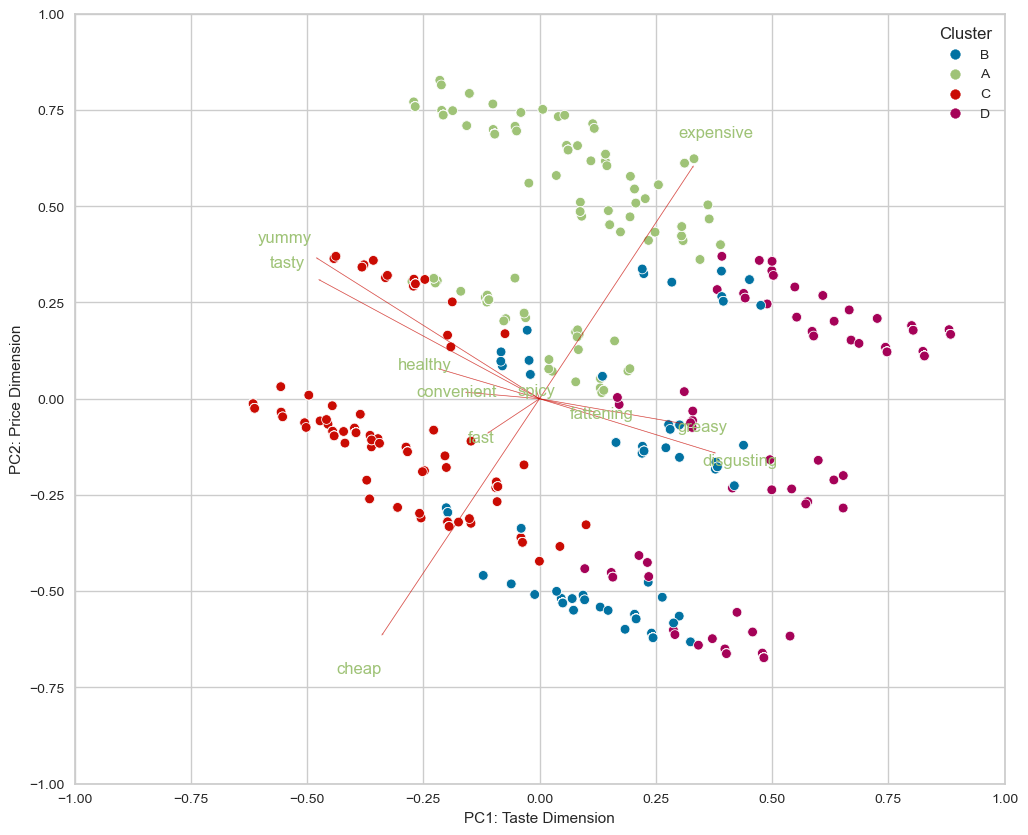

In [62]:
biplot(Data_with_PCs.values[:, 0:2], np.transpose(PC_composition.values[0:2, :]), labels=df_criteria.columns, hue=df_criteria['Cluster'])


* **Segments A and B both view our brand as cheap, with members of segment B having some positive beliefs and members of segment A associating our brand primarily with negative attributes.**
* **At the other end of the price spectrum, majority of people in segments C and D agree that we are not cheap, but disagree on other features with segment C having a negative opinion and segment D having a positive one.**

### Lets add the Cluster column to main dataframe for further analysis for age and gender analysis of clusters

In [63]:
df.head(1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female


In [64]:
df_criteria.head(1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,B


In [65]:
df['Cluster']=df_criteria['Cluster']
df.head(1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,B


### Analysis of Ratings in the segments.

In [66]:
crosstable=pd.crosstab(df['Like'],df['Cluster'])
df_temp=crosstable.transpose()
df_temp

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
Cluster,,,,,,,,,,,
A,6,4,8,7,8,35,41,60,66,47,43
B,23,21,25,22,20,51,31,28,19,2,1
C,4,4,4,9,17,48,69,90,139,111,99
D,119,42,36,21,13,35,11,9,5,0,0


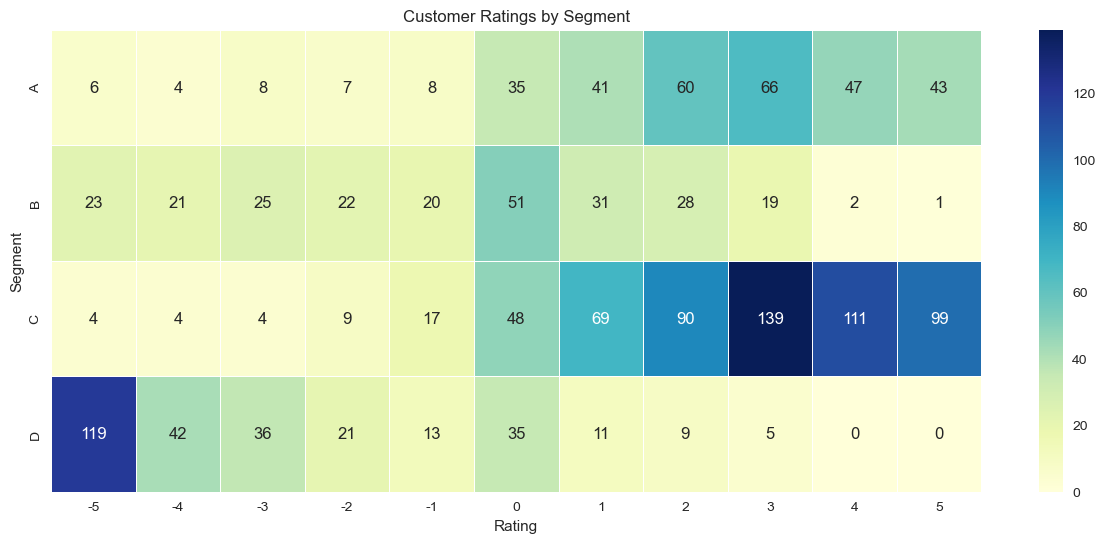

In [67]:
# Create a heatmap using Seaborn
plt.figure(figsize=(15, 6))
sns.heatmap(df_temp, annot=True,fmt="d", cmap='YlGnBu', linewidths=0.5)
plt.title('Customer Ratings by Segment')
plt.xlabel('Rating')
plt.ylabel('Segment')
plt.show()


* **Members of segment C rarely express love for us. In stark contrast, members of segment B are significantly more likely to love our brand.**
* **Members of segment A appear to have negative to neutral feelings not as much as C but their likelihood of hating our brand is high.**
* **Majority of Members of the segment D have the strong positive feelings towards us**

### Gender distribution in the segments

In [68]:
crosstable=pd.crosstab(df['Gender'],df['Cluster'])
crosstable

Cluster,A,B,C,D
Gender,,,,
Female,156,133,357,142
Male,169,110,237,149


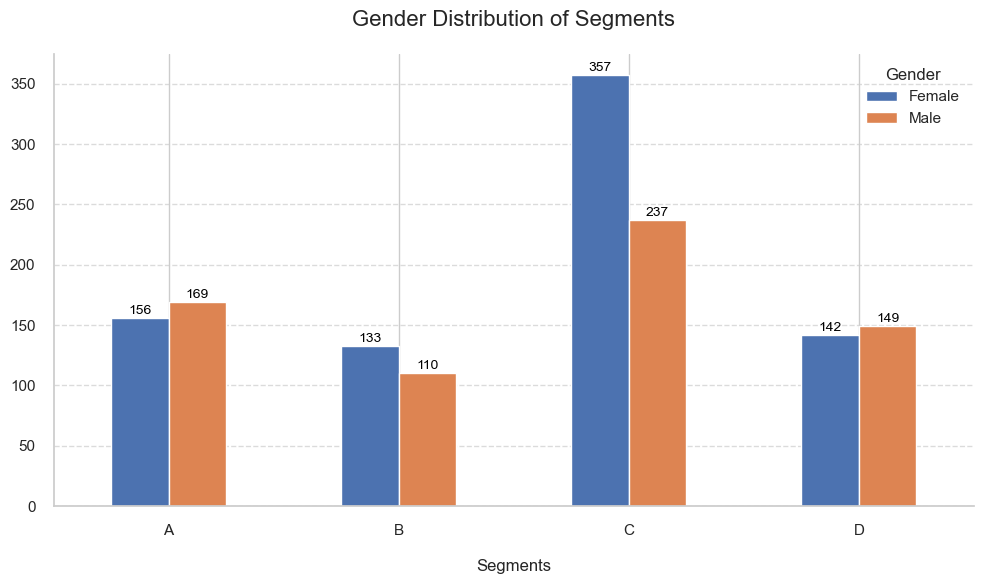

In [69]:
sns.set(style="whitegrid")

# Create the bar plot
ax = crosstable.transpose().plot(kind='bar', rot=0, figsize=(10, 6))

plt.xlabel("Segments", labelpad=15, fontsize=12)
plt.title("Gender Distribution of Segments", pad=20, fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():d}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


* **Segment C and segment D have a similar gender distribution with higher males.** 
* **Segment B and A contains significantly more Women.**

### Age distribution in the segments

<Axes: xlabel='Cluster', ylabel='Age'>

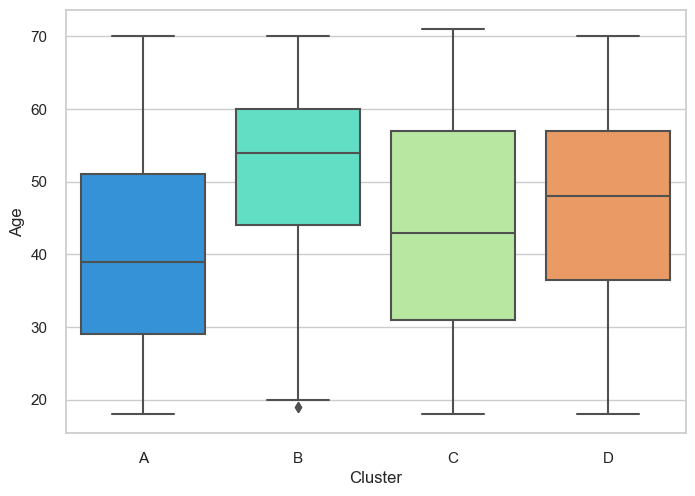

In [70]:
sns.boxplot(x="Cluster", y="Age", data=df.sort_values('Cluster'),palette='rainbow')

### Here , we see a important correlation between age and perception

* **Segments B and D, who have a positive perception towards our brand, are in younger age groups**
* **Young people are more likely to like us** 

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">
    <center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    8. Selecting segments to target</h3></center>
</div>


In [71]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [72]:
def encoder(string):
    if(string=='Never'):
        return 0
    elif(string=='Once a year'):
        return 1
    elif(string=='Every three months'):
        return 2
    elif(string=='Once a month'):
        return 3
    elif(string=='Once a week'):
        return 4
    elif(string=='More than once a week'):
        return 5
    else:
        return 'Something missed'
    

In [73]:
df['VisitFrequency']=df['VisitFrequency'].apply(lambda x:encoder(x))

In [74]:
df['VisitFrequency'].unique()

array([2, 4, 3, 1, 5, 0], dtype=int64)

In [75]:
df_visit=pd.DataFrame(df.groupby('Cluster')['VisitFrequency'].mean())

In [76]:
df_Like=pd.DataFrame(df.groupby('Cluster')['Like'].mean())

In [77]:
df_visit

,VisitFrequency
Cluster,
A,2.818462
B,1.888889
C,2.892256
D,1.271478


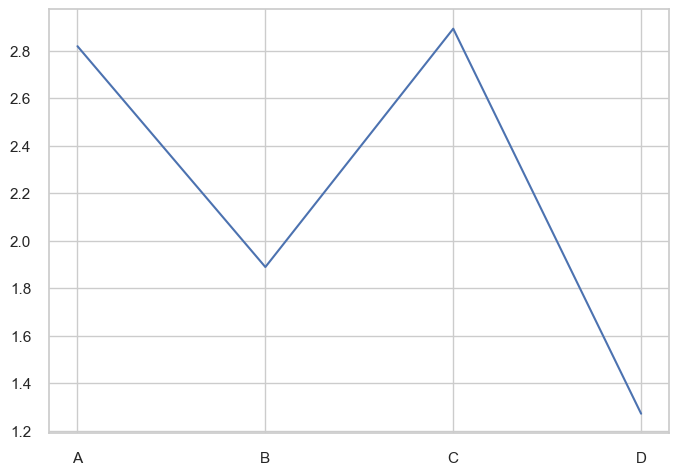

In [78]:
plt.plot(df_visit)

* **The visiting frequency is quite high for the B and D segment and low for the A and B segments**

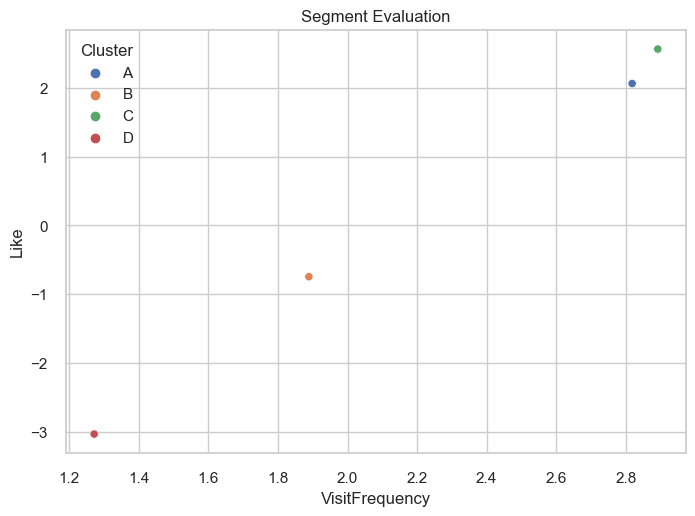

In [79]:
plt.title('Segment Evaluation')
sns.scatterplot(y=df_Like['Like'],x=df_visit['VisitFrequency'],hue=df_Like.index)
plt.show()

* **Market segments B and D are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like us and visit us frequently. These segments need to be retained, and their needs must be satisfied in the future.**

* **Market segment C is located in the least attractive position. Members of this segment hate us, and rarely eat at our stores, making them unattractive as a potential market segment.**

* **Market segment A does not currently perceive us in a positive way. But in terms of likes and visitation frequency,some members of market segment A present as a viable target segment. Marketing action could attempt to address the negative perceptions of this segment, and re-inforce positive perceptions. As a result, we may be able to broaden our customer base.**

# <a name='Customizing_the_marketing_mix'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
7. Customizing the marketing mix</h3></center>
</div>

* **We can design marketing mix based on the seleted market segment.**

* **If, for example, we decide to focus on segment D (relatively young customers who like us, think the food is yummy and tasty, but perceive it as pretty expensive, we can offer a Budget line to cater specifically to the price expectations of this segment.**
* **The aim is that Members of segment D become loyal customers who, as they start earning more money, will not care about the price any more.**
* **Communication channels which are heavily used by members of this segment, can be used to communicate the availability of the new budget products**